# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

#### 1 Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
#### 2 Dibujar todas las columnas numéricas.

<AxesSubplot:xlabel='Year'>

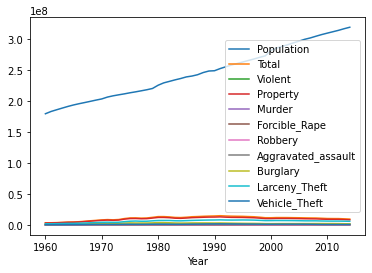

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()


In [2]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


#### 3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas.

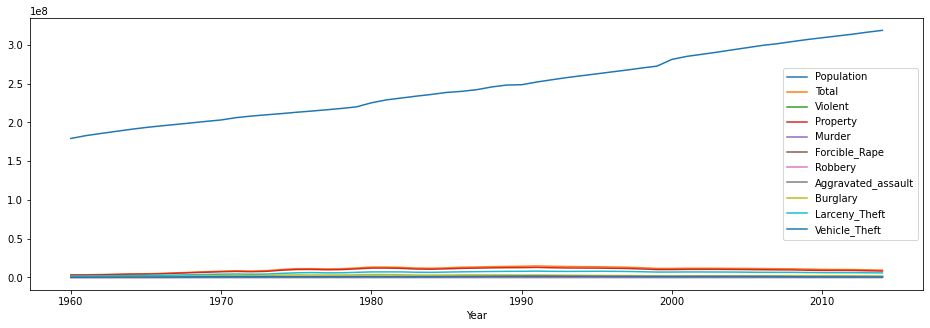

In [3]:
fig, ax = plt.subplots(figsize = (16,5))  # Create a figure and an axes.
ax.plot(df.index, df, label= df.columns.tolist())  # Plot some data on the axes.

ax.set_xlabel('Year')  # Add an x-label to the axes.


ax.legend()  # Add a legend.

<AxesSubplot:xlabel='Year'>

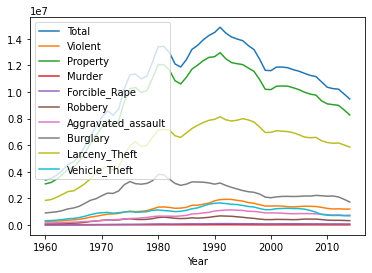

In [16]:
df.loc[:, 'Total':].plot()

#### usando 

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend

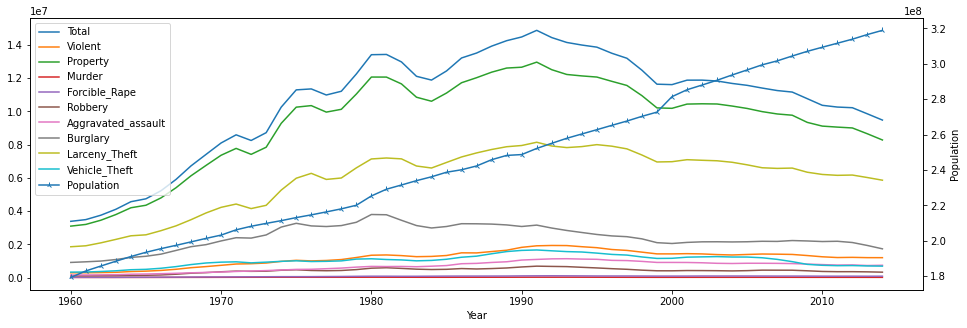

In [4]:
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(df.index, df.iloc[:,1:], label = df.iloc[:,1:].columns.tolist())

ax.set_xlabel('Year')
ax2 = ax.twinx()
ax2.plot(df.index, df.Population, label= 'Population', marker = '2')
ax2.set_ylabel('Population')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax.legend(lines, labels, loc=0);


### 4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación?

In [5]:
df.head(3)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


In [8]:
df_new = df.loc[: ,"Violent":]
df_new.head()


,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


<AxesSubplot:>

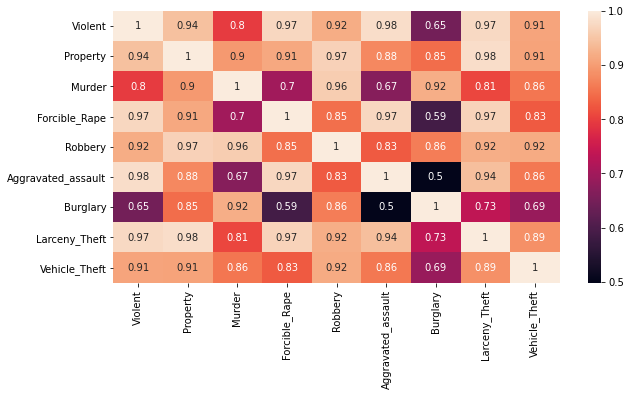

In [13]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df_new.corr(), annot= True)

* Las columnas con mayor correlación son:


In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    df = pd.DataFrame(au_corr[0:n], columns=['Correlation'])
    df.reset_index(inplace=True)
    return df


print("Top Absolute Correlations")
print(get_top_abs_correlations(df = df_new, n= 5))

Top Absolute Correlations
         level_0             level_1  Correlation
0        Violent  Aggravated_assault     0.981071
1       Property       Larceny_Theft     0.980528
2        Violent       Larceny_Theft     0.974791
3  Forcible_Rape  Aggravated_assault     0.974379
4        Violent       Forcible_Rape     0.973914


#### 5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

In [24]:
murder_cor = get_top_abs_correlations(df_new, n=50)

In [25]:
print(murder_cor)

               level_0             level_1  Correlation
0              Violent  Aggravated_assault     0.981071
1             Property       Larceny_Theft     0.980528
2              Violent       Larceny_Theft     0.974791
3        Forcible_Rape  Aggravated_assault     0.974379
4              Violent       Forcible_Rape     0.973914
5        Forcible_Rape       Larceny_Theft     0.967417
6             Property             Robbery     0.965363
7               Murder             Robbery     0.960156
8              Violent            Property     0.943351
9   Aggravated_assault       Larceny_Theft     0.941906
10             Robbery       Larceny_Theft     0.920460
11              Murder            Burglary     0.920207
12             Violent             Robbery     0.919249
13             Robbery       Vehicle_Theft     0.916280
14            Property       Forcible_Rape     0.912517
15             Violent       Vehicle_Theft     0.909182
16            Property       Vehicle_Theft     0

In [26]:
# hago una máscara
murder_cor[(murder_cor.level_0 == "Murder") | (murder_cor.level_1 == "Murder")].head(5)



,level_0,level_1,Correlation
7,Murder,Robbery,0.960156
11,Murder,Burglary,0.920207
17,Property,Murder,0.895641
22,Murder,Vehicle_Theft,0.856600
27,Murder,Larceny_Theft,0.806279


In [28]:
x = np.array(df_new[["Robbery", "Burglary", "Property", "Vehicle_Theft", "Larceny_Theft"]])
y = np.array(df_new["Murder"])

In [30]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [35]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # partimos nuestro conjunto de datos

################
[[1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01 2.55523178e+02 7.74312661e+02]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02 1.37174211e+03]
 [1.00000000e+00 2.02020202e-01 4.08121620e-02 8.24488122e-03
  1.66563257e-03 3.36491428e-04 6.79780663e-05]
 [1.00000000e+00 7.07070707e-01 4.99948985e-01 3.53499282e-01
  2.49948987e-01 1.76731607e-01 1.24961743e-01]
 [1.00000000e+00 5.35353535e+00 2.86603408e+01 1.53434148e+02
  8.21415134e+02 4.39747496e+03 2.35420377e+04]
 [1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04 6.44044382e+05]
 [1.00000000e+00 7.57575758e+00 5.73921028e+01 4.34788658e+02
  3.29385347e+03 2.49534354e+04 1.89041177e+05]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01 1.71467764e+02
  9.52598689e+02 5.29221494e+03 2.94011941e+04]
 [1.00000000e+00 1.61616162e+00 2.61197837e+00 4.22137918e+00
  6.82243100e+00 1.10261511e+01 1.7820042

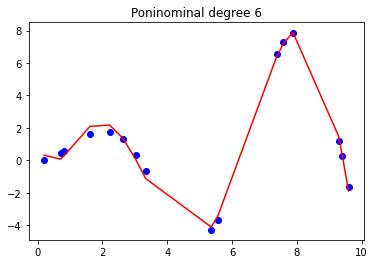

################
[[1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01 2.55523178e+02 7.74312661e+02 2.34640200e+03]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02 1.37174211e+03 4.57247371e+03]
 [1.00000000e+00 2.02020202e-01 4.08121620e-02 8.24488122e-03
  1.66563257e-03 3.36491428e-04 6.79780663e-05 1.37329427e-05]
 [1.00000000e+00 7.07070707e-01 4.99948985e-01 3.53499282e-01
  2.49948987e-01 1.76731607e-01 1.24961743e-01 8.83567876e-02]
 [1.00000000e+00 5.35353535e+00 2.86603408e+01 1.53434148e+02
  8.21415134e+02 4.39747496e+03 2.35420377e+04 1.26033131e+05]
 [1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04 6.44044382e+05 5.98505891e+06]
 [1.00000000e+00 7.57575758e+00 5.73921028e+01 4.34788658e+02
  3.29385347e+03 2.49534354e+04 1.89041177e+05 1.43213013e+06]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01 1.71467764e+02
  9.52598689e+02 5.29221494e+03 2.94011941e+04

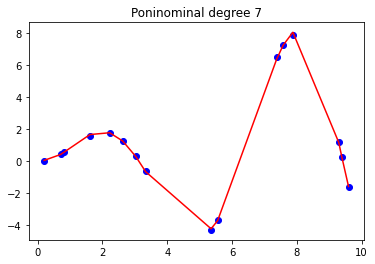

################
[[1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01 2.55523178e+02 7.74312661e+02 2.34640200e+03
  7.11030910e+03]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02 1.37174211e+03 4.57247371e+03
  1.52415790e+04]
 [1.00000000e+00 2.02020202e-01 4.08121620e-02 8.24488122e-03
  1.66563257e-03 3.36491428e-04 6.79780663e-05 1.37329427e-05
  2.77433186e-06]
 [1.00000000e+00 7.07070707e-01 4.99948985e-01 3.53499282e-01
  2.49948987e-01 1.76731607e-01 1.24961743e-01 8.83567876e-02
  6.24744963e-02]
 [1.00000000e+00 5.35353535e+00 2.86603408e+01 1.53434148e+02
  8.21415134e+02 4.39747496e+03 2.35420377e+04 1.26033131e+05
  6.74722822e+05]
 [1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04 6.44044382e+05 5.98505891e+06
  5.56187292e+07]
 [1.00000000e+00 7.57575758e+00 5.73921028e+01 4.34788658e+02
  3.29385347e+03 2.49534354e+04 1.89041177e+05 1.43213013e+06
  1.084

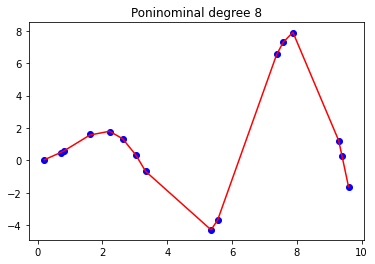

In [40]:
# Min and max degree of polynomials features to consider
degree_min = 6
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly)
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)
    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    score = r2_score(y_train, y_pred)
    scores.append(score)
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()

    input("Enter to next grade")

In [38]:
print("SCORES DEGREE FROM 6 TO 9:", scores)    

SCORES DEGREE FROM 6 TO 9: [0.992690202928154, 0.9994889120983732, 0.9999514546512389]


### CONCLUSIONES:

-Ha habido sobreentrenamiento, hemos forzado al modelo a encajar perfectamente para ese conjunto de datos.